In [ ]:
!pip install import_ipynb

In [ ]:
!pip install xgboost

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import json
import csv
import urllib.request
import pandas as pd
import numpy as np
import pymysql
from io import BufferedReader
import import_ipynb
import ML_Portfolio_All_statemens
import matplotlib.pyplot as plt


# THIS CODE NEEDS TO BE RUN BEFORE MAKING THE SQL CONNECTION

pymysql.converters.encoders[np.float64] = pymysql.converters.escape_float
pymysql.converters.conversions = pymysql.converters.encoders.copy()
pymysql.converters.conversions.update(pymysql.converters.decoders)

As we see in the previous file, we faced overfitting issue in DNN. Also due to many features, accuracy could be less for random forest model. So we will do the PCA analysis to decide how many features are important or explaining 95% of variation of the data.

In [3]:
from sklearn.decomposition import PCA

pca=PCA(0.95).fit(ML_Portfolio_All_statemens.X_scaledtr)
x_train=pca.transform(ML_Portfolio_All_statemens.X_scaledtr)
x_test=pca.transform(ML_Portfolio_All_statemens.X_scaledte)
len(x_train)
pca.n_components_

21816

18

As pca component give the count for the important components, we will take 18 top important features from the random forest which we calculated and shown in ML_portfolio_Al_Statement.ipynb file.

On basis of these top 18 features we will build our random forest model again. We will recheck the accuracy. 
Also we will re-run the DNN to check whether we could reduce the overfitting issue with increase accuracy in the DNN model.

In [4]:
from sklearn.model_selection import train_test_split


X = ML_Portfolio_All_statemens.dfmerge_param[['EPS_DILUTED','EBITDA','NET_CASH_FLOW','NET_CASH_MARKET_CAP','EBIT','CASH_CASH_EQUIVALENT',
                                        'OPERATING_INCOME','EPS','REVENUE_GROWTH','FREE_CASH_FLOW','ISSUANCE_SHARES_BUYBACKS'
                                        ,'PROFIT_MARGIN','NET_INCOME','CONSOLIDATED_INCOME','EBIT_MARGIN', 'OPERATING_CASH_FLOW',
                                         'TOTAL_SHAREHOLDERS_EQUITY','FINANCING_CASH_FLOW','FCF_MARGIN','NET_INCOME_COM',
                                              'RETAINED_EARNINGS_DEFICIT','recession_prob','treasury_rate']].copy()
X.head()
Y = ML_Portfolio_All_statemens.dfmerge_param['TREND'] #target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

,EPS_DILUTED,EBITDA,NET_CASH_FLOW,NET_CASH_MARKET_CAP,EBIT,CASH_CASH_EQUIVALENT,OPERATING_INCOME,EPS,REVENUE_GROWTH,FREE_CASH_FLOW,...,CONSOLIDATED_INCOME,EBIT_MARGIN,OPERATING_CASH_FLOW,TOTAL_SHAREHOLDERS_EQUITY,FINANCING_CASH_FLOW,FCF_MARGIN,NET_INCOME_COM,RETAINED_EARNINGS_DEFICIT,recession_prob,treasury_rate
0,-0.180000,"-1,018,041.000000","241,076.000000",1.482400,"-1,093,626.000000","20,103,502.000000","-1,349,454.000000",-0.180000,-0.126800,"227,128.000000",...,"-1,394,125.000000",-0.062700,"352,086.000000","22,522,439.000000","13,948.000000",0.013000,"-1,394,125.000000","7,594,492.000000",0.120000,3.266284
1,1.440000,"42,217,000.000000","-10,397,000.000000",-0.660900,"27,612,000.000000","100,205,000.000000","37,023,000.000000",1.440000,-0.067300,"51,633,000.000000",...,"33,030,000.000000",0.058800,"55,640,000.000000","188,041,000.000000","-52,960,000.000000",0.110000,"19,076,000.000000","60,048,000.000000",0.120000,3.266284
2,-0.050000,"238,725.000000","232,105.000000",-0.006800,"-163,390.000000","2,126,150.000000","-401,390.000000",-0.050000,-0.090500,"-487,406.000000",...,"-743,441.000000",-0.016700,"788,313.000000","11,067,483.000000","462,155.000000",-0.049800,"-743,441.000000","-5,734,591.000000",0.120000,3.266284
3,6.720000,"24,044,419.000000","-798,360.000000",0.124300,"22,032,207.000000","14,404,500.000000","20,926,323.000000",6.720000,0.422600,"2,886,297.000000",...,"16,404,600.000000",0.371900,"3,341,294.000000","61,445,968.000000","1,963,035.000000",0.048700,"15,188,773.000000","30,237,707.000000",0.120000,3.266284
4,-1.140000,"-1,728,000.000000","-35,000.000000",-0.104000,"-2,087,000.000000","155,000.000000","-2,729,000.000000",-1.140000,0.151100,"285,000.000000",...,"-2,210,000.000000",-0.509300,"736,000.000000","18,282,000.000000","52,000.000000",0.069500,"-2,210,000.000000","-40,577,000.000000",0.120000,3.266284


In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
#random_forest.fit(x_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

0.9786853685368537

oob score: 72.37 %


In [38]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix, accuracy_score

print(accuracy_score(Y_test,Y_prediction))
print(classification_report(Y_test,Y_prediction))
print(confusion_matrix(Y_test,Y_prediction))

0.7315795102128114
             precision    recall  f1-score   support

          0       0.74      0.75      0.74      4842
          1       0.73      0.71      0.72      4509

avg / total       0.73      0.73      0.73      9351

[[3621 1221]
 [1289 3220]]


In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgbclassifier = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.009,
                max_depth = 10, alpha = 10, n_estimators = 50, random_state=1)

model_xgb = xgbclassifier.fit(X_train,Y_train)
xgb_pred = xgbclassifier.predict(X_test)

acc_xgb = round(xgbclassifier.score(X_train, Y_train) * 100, 2)

C:\Users\Sudip\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sudip\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix, accuracy_score

print(accuracy_score(Y_test,xgb_pred))
print(classification_report(Y_test,xgb_pred))
print(confusion_matrix(Y_test,xgb_pred))

0.722703454176024
             precision    recall  f1-score   support

          0       0.72      0.75      0.74      4842
          1       0.72      0.69      0.71      4509

avg / total       0.72      0.72      0.72      9351

[[3655 1187]
 [1406 3103]]


In [41]:
from sklearn.preprocessing import StandardScaler

scaler_tr = StandardScaler().fit(X_train)
X_scaledtr = scaler_tr.transform(X_train)

scaler_te = StandardScaler().fit(X_test)
X_scaledte = scaler_te.transform(X_test)

In [43]:
import keras
from keras import layers
from keras import regularizers
from sklearn.model_selection import KFold

model3=keras.Sequential()
model3.add(keras.layers.Dense(100, input_dim=23, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
model3.add(keras.layers.Dense(50, activation='relu'))
model3.add(keras.layers.Dense(25, activation='relu'))
model3.add(keras.layers.Dense(12, activation='relu'))
model3.add(keras.layers.Dense(6, activation='relu'))
model3.add(keras.layers.Dense(3, activation='relu'))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model3.fit(X_scaledtr, Y_train, epochs=200, batch_size=1000, validation_data=(X_scaledte, Y_test))

Train on 21816 samples, validate on 9351 samples
Epoch 1/200
21816/21816 [==============================] - 3s 140us/step - loss: 4.0188 - acc: 0.5750 - val_loss: 3.5046 - val_acc: 0.6073
Epoch 2/200
21816/21816 [==============================] - 0s 9us/step - loss: 3.1113 - acc: 0.6190 - val_loss: 2.7154 - val_acc: 0.6113
Epoch 3/200
21816/21816 [==============================] - 0s 9us/step - loss: 2.4196 - acc: 0.6399 - val_loss: 2.1243 - val_acc: 0.6365
Epoch 4/200
21816/21816 [==============================] - 0s 9us/step - loss: 1.9039 - acc: 0.6645 - val_loss: 1.6846 - val_acc: 0.6629
Epoch 5/200
21816/21816 [==============================] - 0s 9us/step - loss: 1.5192 - acc: 0.6718 - val_loss: 1.3609 - val_acc: 0.6654
Epoch 6/200
21816/21816 [==============================] - 0s 9us/step - loss: 1.2389 - acc: 0.6746 - val_loss: 1.1294 - val_acc: 0.6729
Epoch 7/200
21816/21816 [==============================] - 0s 9us/step - loss: 1.0402 - acc: 0.6767 - val_loss: 0.9679 - val_ac

<Figure size 1080x432 with 0 Axes>

Text(0.5,1,'Model accuracy')

Text(0,0.5,'Accuracy')

Text(0.5,0,'Epoch')

Text(0.5,1,'Model loss')

Text(0,0.5,'Loss')

Text(0.5,0,'Epoch')

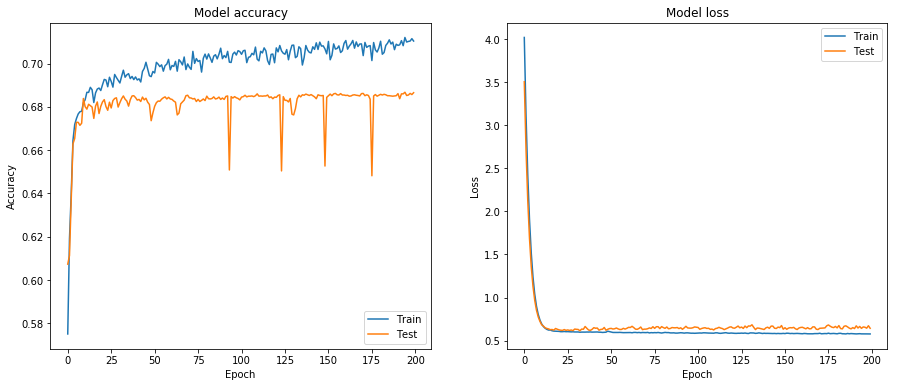

In [44]:
# plot the accuracy and loss
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

In [46]:
import keras
from keras import layers
from keras import regularizers
from sklearn.model_selection import KFold

x = X.values
kf = KFold(5, shuffle=True,random_state=2)
nn_y = []
nn_pred = []
fold = 0

for train,test in kf.split(x):
    fold+=1
    print("Fold #",{fold})
    
    x_train = X_scaledtr
    y_train = Y_train
    x_test = X_scaledte
    y_test = Y_test
    model3=keras.Sequential()
    model3.add(keras.layers.Dense(100, input_dim=23, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
    model3.add(keras.layers.Dense(50, activation='relu'))
    model3.add(keras.layers.Dense(25, activation='relu'))
    model3.add(keras.layers.Dense(12, activation='relu'))
    model3.add(keras.layers.Dense(6, activation='relu'))
    model3.add(keras.layers.Dense(3, activation='sigmoid'))
    model3.add(keras.layers.Dense(1, activation='sigmoid'))
    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model3.fit(X_scaledtr, Y_train, epochs=125, batch_size=1000, validation_data=(X_scaledte, Y_test))

Fold # {1}
Train on 21816 samples, validate on 9351 samples
Epoch 1/125
21816/21816 [==============================] - 3s 150us/step - loss: 4.0573 - acc: 0.4862 - val_loss: 3.5271 - val_acc: 0.4832
Epoch 2/125
21816/21816 [==============================] - 0s 9us/step - loss: 3.1249 - acc: 0.5304 - val_loss: 2.7226 - val_acc: 0.5520
Epoch 3/125
21816/21816 [==============================] - 0s 9us/step - loss: 2.4244 - acc: 0.6000 - val_loss: 2.1264 - val_acc: 0.6136
Epoch 4/125
21816/21816 [==============================] - 0s 9us/step - loss: 1.9059 - acc: 0.6220 - val_loss: 1.6883 - val_acc: 0.6184
Epoch 5/125
21816/21816 [==============================] - 0s 9us/step - loss: 1.5230 - acc: 0.6596 - val_loss: 1.3647 - val_acc: 0.6669
Epoch 6/125
21816/21816 [==============================] - 0s 9us/step - loss: 1.2410 - acc: 0.6783 - val_loss: 1.1328 - val_acc: 0.6644
Epoch 7/125
21816/21816 [==============================] - 0s 9us/step - loss: 1.0405 - acc: 0.6848 - val_loss: 0.96

<Figure size 1080x432 with 0 Axes>

Text(0.5,1,'Model accuracy')

Text(0,0.5,'Accuracy')

Text(0.5,0,'Epoch')

Text(0.5,1,'Model loss')

Text(0,0.5,'Loss')

Text(0.5,0,'Epoch')

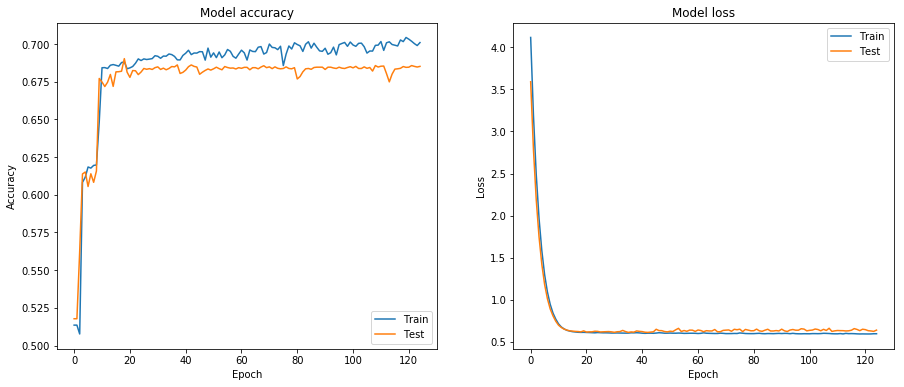

In [47]:
# plot the accuracy and loss
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

From above all data we can see that our DNN model improved a lot with much better accuracy than previous model with all features. Also our Random forest model accuracy imroved a bit. With this we can do our final prediction.

Now, we will run our model on entire dataframe, to check the prediction and actual results of all the stocks in our dataset.

In [48]:
Y_prediction_full = random_forest.predict(X)

ML_Portfolio_All_statemens.dfmerge_param['Prediction'] = Y_prediction_full
ML_Portfolio_All_statemens.dfmerge_param.head()
ML_Portfolio_All_statemens.dfmerge_param.to_csv('Prediction_All_stmt_few_features.csv')

,year,recession_prob,treasury_rate,STOCK_TIKR,CASH_CASH_EQUIVALENT,SHORT_TERM_INVESTMNET,CASH_SHORT_TERM_INVST,RECEIVABLES,INVENTORIES,TOTAL_CURRENT_ASSETS,...,CONSOLIDATED_INCOME,EARNINGS_BEFORE_MARGIN,NET_PROFIT_MARGIN,sector,mktCap,AVG_DAILY_RET,ANNUAL_RETURN,ANN_RET_SnP,TREND,Prediction
0,2009,0.120000,3.266284,FORD,"20,103,502.000000",0.000000,"20,103,502.000000","3,259,462.000000","666,485.000000","222,000.000000",...,"-1,394,125.000000",-0.062700,-0.079900,3,9310993.35,0.000825,35.135072,23.450000,1,1
1,2009,0.120000,3.266284,FORTY,"100,205,000.000000","58,009,000.000000","158,214,000.000000","130,237,000.000000","2,439,000.000000","313,365,000.000000",...,"33,030,000.000000",0.058300,0.040600,9,969517079.96,-0.000680,-21.979784,23.450000,0,0
2,2009,0.120000,3.266284,FSI,"2,126,150.000000",0.000000,"2,126,150.000000","1,544,364.000000","2,796,307.000000","6,588,174.000000",...,"-743,441.000000",-0.023500,-0.076000,1,28726435.92,0.001973,105.361674,23.450000,1,1
3,2009,0.120000,3.266284,FTFT,"14,404,500.000000",0.000000,"14,404,500.000000","27,621,753.000000","4,925,625.000000","48,487,920.000000",...,"16,404,600.000000",0.358100,0.256400,4,11250795.92,0.001264,58.592164,23.450000,1,1
4,2009,0.120000,3.266284,GBR,"155,000.000000",0.000000,"155,000.000000","203,000.000000",0.000000,"925,000.000000",...,"-2,210,000.000000",-0.539300,-0.539300,5,3324780.00,0.000345,13.400058,23.450000,0,0


After predicting the dataset we will filer 'UP trend' (TREND=1) stocks only for mid-size companies (having market cap at least 1 billion) into consideration to finalize our ML or AL driven portfolio, to reduce the risk of investors by avoid penny and small stocks.

In [49]:
df_ml_port_1 = ML_Portfolio_All_statemens.dfmerge_param[['STOCK_TIKR','year','mktCap','Prediction']].copy()
df_ml_port_1['mktCap'] = df_ml_port_1['mktCap'].convert_objects(convert_numeric=True)
df_ml_port_1.head()

C:\Users\Sudip\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,STOCK_TIKR,year,mktCap,Prediction
0,FORD,2009,"9,310,993.350000",1
1,FORTY,2009,"969,517,079.960000",0
2,FSI,2009,"28,726,435.920000",1
3,FTFT,2009,"11,250,795.920000",1
4,GBR,2009,"3,324,780.000000",0


In [50]:
df_ml_port_up = df_ml_port_1[(df_ml_port_1['Prediction'] == 1) & (df_ml_port_1['mktCap'] > 10000000000)]
df_ml_port_up.head()
df_ml_port_up.shape[0]

,STOCK_TIKR,year,mktCap,Prediction
136,CMCSA,2009,"197,130,041,640.769989",1
139,GE,2009,"101,028,605,725.000000",1
157,XOM,2009,"293,635,696,275.349976",1
164,GILD,2009,"87,219,110,000.000000",1
167,NUE,2009,"17,550,398,648.700001",1


1470

We have 10 years of data (10 rows for each company). We will take only those stocks into our AL portfolio for which stock is at least 6 times trend is UP. (60% of time stock performed better than S&P500 and positive trend).

In [59]:
mycountval = df_ml_port_up.groupby('STOCK_TIKR')['Prediction'].count()
#mycountval
dfcountval = pd.DataFrame(mycountval)
dfcountval.rename(columns={'Prediction':'COUNT'}, inplace=True)
dfcountval = dfcountval.reset_index()
dfcountval.head()
dfcountval ['Next_Yr_beat_SnP'] = np.where( dfcountval['COUNT'] >= 6,'Yes','No')
dfcountval.head()

,STOCK_TIKR,COUNT
0,A,3
1,AAL,4
2,AAP,1
3,AAPL,1
4,ABB,3


,STOCK_TIKR,COUNT,Next_Yr_beat_SnP
0,A,3,No
1,AAL,4,No
2,AAP,1,No
3,AAPL,1,No
4,ABB,3,No


In [60]:
df_ml_port = dfcountval[dfcountval['Next_Yr_beat_SnP'] == 'Yes']
df_ml_port.head()
df_ml_port.shape[0]

,STOCK_TIKR,COUNT,Next_Yr_beat_SnP
25,ALNY,7,Yes
28,AMD,6,Yes
138,CXO,6,Yes
158,DQ,6,Yes
186,ERJ,6,Yes


15

We got list of 15 stocks which will perform better than S&P500 and positive trend. Few stocks have 60% assurance and few have 70 to 80% of assuarance.